In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Regressão linear simples (reta de mínimos quadrados)

## $ \S 0 $ Introdução

Considere um conjunto de $ m \ge 2 $ dados $ (x_1, y_1), \dots, (x_m, y_m) $.
Se suspeitamos que possa haver uma relação aproximadamente linear entre as
variáveis $ x $ e $ y $ representadas por eles, é natural tentar modelar esta
relação através de um polinômio de grau $ 1 $,
$$
    y = f(x) = \alpha + \beta x\,.
$$
Observe que o gráfico de $ f $ é uma reta.
Como podemos escolher os parâmetros $ \alpha $ e $ \beta $ de modo a obter a
reta que melhor se ajusta aos dados?  O **resíduo**
$$
e_i= y_i - f(x_i) \qquad (i = 1, \cdots, m)
$$
mede a discrepância entre o $ i $-ésimo dado e o seu valor estimado.
Seguindo o critério do método dos mínimos quadrados, gostaríamos de minimizar a
_soma dos quadrados dos resíduos_
$$
    S(\alpha, \beta) = \sum_{i=1}^m e_i^2
    = \sum_{i=1}^m \big[y_i - (\alpha + \beta x_i)\big]^2\,.
$$

Como veremos, sob condições bastante generosas (é necessário somente que haja ao
menos dois dados $ (x_i, y_i) $ e $ (x_j, y_j) $ com $ x_i \ne x_j $), existe
um único par $ (\hat \alpha, \hat \beta) $ que minimiza $ S $. A reta correspondente
é chamada de **reta de mínimos quadrados**, **reta de regressão** ou
**reta que melhor se ajusta** aos dados, e o método como um todo é chamado de
**regressão linear simples**. 

📝 Aqui _regressão_ se refere à situação em que queremos modelar, através de uma
função, uma relação quantitativa entre duas ou mais variáveis. Historicamente este
termo vem do trabalho de Francis Galton no século XIX, que observou que a
altura de uma criança tendia a regredir à média da população em comparação com
as alturas dos seus pais. O adjetivo _simples_ serve de contraste à regressão
linear _múltipla_, em que $ y $ depende de mais de uma variável $ x $.

![Reta de mínimos quadrados](regressao_simples.png)


Apresentaremos três maneiras de determinar a reta de mínimos quadrados:
1. Usando uma manipulação para transformar o problema de minimizar $ S $
no problema de minimizar a norma de um certo vetor em $ \mathbb R^m $.
2. Utilizando Cálculo para determinar o único ponto crítico da função $ S $.
3. Expressando o problema em termos da projeção ortogonal em um
   certo plano em $ \mathbb R^m $.

Os métodos 2 e 3 são os mais tradicionais, porém preferimos o primeiro método por ser
mais simples e porque ele nos fornecerá rapidamente uma fórmula explícita para
$ \hat \alpha $ e $ \hat \beta $.

# $ \S 1 $ Método 1: minimizando a norma de um vetor em $ \mathbb R^m $

Sejam como antes $ (x_1, y_1), \cdots, (x_m, y_m) $ os dados aos quais pretendemos ajustar uma reta $ y = \alpha + \beta x $. Defina:
* $ \bar x = \frac{1}{m} \sum_{i} x_i $ (média aritmética dos $ x_i $).
* $ \bar y = \frac{1}{m} \sum_{i} y_i $ (média aritmética dos $ y_i $).
* $ \boldsymbol x = (x_1, x_2, \cdots, x_m) \in \mathbb R^m $ (vetor contendo todos os $ x_i $).
* $ \boldsymbol y = (y_1, y_2, \cdots, y_m) \in \mathbb R^m $ (vetor contendo todos os $ y_i $).
* $ \boldsymbol u = (1, 1, \cdots, 1) \in \mathbb R^m $.
* $ \boldsymbol x_0 = \boldsymbol x - \bar x \,\boldsymbol u = (x_1 - \bar x, x_2 - \bar x, \cdots, x_m - \bar x) $ ($ \boldsymbol x $ deslocado para ter soma  das coordenadas $ 0 $).
* $ \boldsymbol y_0 = \boldsymbol y - \bar y \,\boldsymbol u = (y_1 - \bar y, y_2 - \bar y, \cdots, y_m - \bar y) $ ($ \boldsymbol y $ deslocado para ter soma das coordenadas $ 0 $).

Em termos destes vetores, podemos escrever a soma dos quadrados dos resíduos como
\begin{alignat*}{9}
    S(\alpha, \beta) &= \sum_{i=1}^m \big[y_i - (\alpha + \beta x_i)\big]^2 \\
    &= \Vert \boldsymbol y - \alpha \boldsymbol u - \beta \boldsymbol x \Vert^2 \\
    &= \Vert \big(\boldsymbol y_0 + \bar y \boldsymbol u\big) - \alpha \boldsymbol u - \beta \big(\boldsymbol x_0 + \bar x \boldsymbol u\big) \Vert^2 \\
    & = \Vert \underbrace{\big(\boldsymbol y_0 - \beta \boldsymbol x_0\big)}_{\perp\, \boldsymbol u} + \underbrace{\big(\bar y - \beta \bar x - \alpha \big) \boldsymbol u}_{/\hspace{-2pt}/\, \boldsymbol u} \Vert^2 \\
    & = \Vert \boldsymbol y_0 - \beta \boldsymbol x_0\Vert^2 + \Vert \big(\bar y - \beta \bar x - \alpha \big) \boldsymbol u \Vert^2 \\
\end{alignat*}
Precisamos minimizar esta última expressão. O primeiro termo não envolve $ \alpha $. Ele
é minimizado quando $ \beta \boldsymbol x_0 $ é a projeção ortogonal de $ \boldsymbol
y_0 $ na reta por $ \boldsymbol x_0 $, ou seja:
$$
    \boxed{\ \hat \beta = \frac{\boldsymbol x_0 \cdot \boldsymbol y_0}{\Vert \boldsymbol x_0 \Vert^2}
    = \frac{\sum_{i = 1}^m (x_i - \bar x)(y_i - \bar x)}{\sum_{i=1}^m (x_i - \bar x)^2}\ }
$$
E conseguiremos anular o segundo termo se tomarmos $ \alpha $ igual a
$$
    \boxed{\ \hat \alpha = \bar y - \hat \beta \bar x}
$$
Assim, desde que $ \boldsymbol x_0
\ne \boldsymbol 0 $, ou seja, desde que nem todos os $ x_i $ sejam iguais,
_a reta dos mínimos quadrados é única e é descrita pela equação_
$$
    y = \hat\alpha + \hat\beta x
$$
_para $ \hat\alpha $ e $ \hat\beta $ como destacado acima._
Além disto, concluímos da expressão para $ S(\alpha, \beta) $ obtida acima
que _o menor valor possível para a soma dos quadrados dos resíduos é_
$$
    \boxed{\ S(\hat\alpha, \hat\beta) = \Vert{\boldsymbol y_0 - \hat\beta \boldsymbol x_0}\Vert^2
    = \Vert \boldsymbol y_0 \Vert^2 - \frac{(\boldsymbol x_0 \cdot \boldsymbol y_0)^2}{\Vert \boldsymbol x_0 \Vert^2}\ }
$$
Geometricamente, este número representa _o quadrado da norma  da
componente de $ \boldsymbol y_0 $ ortogonal a_ $ \boldsymbol x_0 $.

📝 Observe que  $ \hat\alpha $ é a altura em que a reta dos mínimos quadrados
intercepta o eixo-$ y $, enquanto $ \hat \beta $ é a sua inclinação.

📝 Se o número $ m $ de pontos é igual a $ 1 $, a reta de mínimos quadrados
não está bem definida (qualquer reta pelo único dado anula o único resíduo).
Se $ m = 2 $, então a reta de mínimos quadrados coincide com a única reta
que passa por estes pontos.

__Problema 1:__ Encontre a reta mais próxima dos pontos $ (0, 6) $, $ (1, 0) $ e $ (2, 0) $.

_Solução:_

# $ \S 2 $ Método 2: Encontrando os pontos críticos de $ S $

Os pontos críticos de $ S $ são os pares $ (\alpha, \beta) $ para os quais
$$
    \begin{cases}
        \displaystyle{\frac{\partial S}{\partial \alpha}(\alpha, \beta)} &=
        \displaystyle{-2\sum_{i=1}^m \big[y_i - (\alpha + \beta x_i)\big]} &=& 0 \\
        \displaystyle{\frac{\partial S}{\partial \beta}(\alpha, \beta)} &=
        \displaystyle{-2\sum_{i=1}^m x_i\,\big[y_i - (\alpha + \beta x_i)\big]} &=& 0
    \end{cases}
$$
Ou, reescrevendo numa forma equivalente,
$$
\boxed{
    \begin{cases}
        \phantom{\displaystyle{\Bigg(\sum_{i=1}^m \Bigg)}} m\, \alpha &+& \displaystyle{\Bigg(\sum_{i=1}^m x_i\Bigg)}\,\beta &=& \displaystyle{\sum_{i=1}^m y_i\phantom{x_i}} \\
        \displaystyle{\Bigg(\sum_{i=1}^m x_i\Bigg)}\alpha &+& \displaystyle{\Bigg(\sum_{i=1}^m x_i^2\Bigg)}\,\beta &=& \displaystyle{\sum_{i=1}^m x_i y_i}
    \end{cases}}
$$

Os coeficientes que multiplicam $ \alpha $ e $ \beta $ podem ser obtidos
imediatamente a partir dos dados.  Este é o chamado sistema de
**equações normais**. Apesar da aparência complicada, se trata de um
sistema _linear_ de duas equações em duas indeterminadas $ \alpha $ e $ \beta $,
e que portanto pode facilmente ser resolvido. De fato, ele possui solução única
desde que haja pelo menos um par de valores $ x_i $ distintos; a solução
$ (\hat \alpha , \hat \beta) $ é portanto a mesma que a encontrada na $ \S 1 $.

⚡ Para ver diretamente que o sistema de equações normais tem uma única solução
se existe pelo menos um par $ x_i \ne x_j $, observe que a matriz dos
coeficientes do sistema tem determinante
$$
    m \sum_{i=0}^{m} x_i^2 - \Bigg( \sum_{i=0}^m x_i \Bigg)^2 =
    \left\Vert \boldsymbol u \right \Vert^2\left\Vert \boldsymbol x \right \Vert^2 - (\boldsymbol u \cdot \boldsymbol x)^2\,.
$$
Mas pela desigualdade de Cauchy-Schwarz,
$$
    (\boldsymbol u \cdot \boldsymbol x)^2 \le \left\Vert \boldsymbol u \right \Vert^2\left\Vert \boldsymbol x \right \Vert^2 ,
$$
com igualdade se e somente se $ \boldsymbol x $ é um múltiplo de $ \boldsymbol u $, ou
seja, se e somente se todos os $ x_i $ são iguais. Como esta possibilidade foi
excluída por hipótese, concluímos que o determinante é positivo e o
nosso sistema tem solução única. Isto significa que $ S $ tem
exatamente um ponto crítico. Este é realmente o mínimo global porque $ S(\alpha, \beta) $
tende a $ +\infty $ conforme $ \Vert (\alpha, \beta) \Vert \to +\infty $.

**Exemplo 1:** Encontre a reta de mínimos quadrados para os dados abaixo:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ 1 $   | $ 0 $   |
| $ 2 $   | $ 2 $   |
| $ 3 $   | $ 2 $   |
| $ 4 $   | $ 5 $   |
| $ 5 $   | $ 4 $   |

**Solução:** Primeiro estendemos a tabela com duas colunas contendo os valores de $ x_i^2 $ e $ x_i y_i $ para cada $ i = 1, \dots, 5 $, e também uma nova linha em que são computadas as somas correspondentes a cada coluna:

| $ x_i $ | $ y_i $ | $ x_i^2 $ | $ x_iy_i $ |
|---------|---------|-----------|------------|
| $ 1 $   | $ 0 $   | $ 1 $     | $ 0 $      |
| $ 2 $   | $ 2 $   | $ 4 $     |  $ 4 $     |
| $ 3 $   | $ 2 $   | $ 9 $     | $ 6 $      |
| $ 4 $   | $ 5 $   | $ 16 $    | $ 20 $     |
| $ 5 $   | $ 4 $   | $ 25 $    | $ 20 $     |
|         |         |           |            |
| $ \boldsymbol{15} $  | $ \boldsymbol{13} $  | $ \boldsymbol{55} $    | $ \boldsymbol{50} $     |


Como indicado na última linha da tabela,
$$
\sum_{i=1}^{5} x_i = 15\,,\quad
\sum_{i=1}^{5} y_i = 13\,,\quad
\sum_{i=1}^{5} x_i^2 = 55\,,\quad
\sum_{i=1}^{5} x_iy_i = 50\,.
$$
Logo neste caso o sistema sistema de equações normais é:
\begin{equation*}
    \begin{cases}
        5\alpha  &+&  15\beta & & = 13 \\
        15 \alpha &+& 55 \beta & & = 50
    \end{cases}
\end{equation*}
Agora calcula-se diretamente que a solução é $ \hat\alpha = \frac{-7}{10} $ e
$ \hat \beta = \frac{11}{10} $. (Verifique!)


__Problema 2:__ Encontre a reta que melhor se ajusta aos pontos $ (1, -2) $,
$ (2, 0) $ e $ (4, 2) $ montando e resolvendo o sistema de equações normais
correspondente.

_Solução:_

# $ \S 3 $ Método 3: Regressão linear simples como projeção ortogonal

Considere novamente a coleção de pontos $ (x_1, y_1), \cdots, (x_m, y_m) $.
Existe uma reta que passa _exatamente_ por todos estes pontos se e somente se é
possível encontrar $ \alpha $ e $ \beta $ tais que
$$
\begin{cases}
\alpha + \beta x_1 &= y_1 \\
\alpha + \beta x_2 &= y_2 \\
\phantom{\alpha\ \ }\vdots \\
\alpha + \beta x_m &= y_m \\
\end{cases}
$$
Usando matrizes, este sistema de equações escalares pode ser reescrito como
$$
    A\,\boldsymbol z =
    \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_m \end{bmatrix}
    \begin{bmatrix} \alpha \\ \beta \end{bmatrix} =
    \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{bmatrix} = \boldsymbol y
$$
Esta equação tem solução se e somente se é possível expressar o vetor $
\boldsymbol y \in \mathbb R^m $ do lado direito como combinação linear das duas
colunas
$$ \boldsymbol u = (1, 1, \cdots, 1) \quad
\text{e} \quad \boldsymbol x = (x_1, x_2, \cdots, x_m)
$$
de $ A $. Mas isto é muito improvável se $ m > 2 $, pois neste caso
"quase nenhum" ponto de $ \mathbb R^m $ pertence a este plano.  Visto de outra
forma, se $ m > 2 $, há mais equações que indeterminadas, logo provavelmente
elas são incompatíveis.

Em lugar disto, o melhor que podemos fazer é obter uma combinação linear das
colunas que _minimize a distância a_ $ \boldsymbol y $, digamos aquela com
coeficientes $ \hat{\boldsymbol z} = (\hat \alpha, \hat \beta) $.
Esta combinação linear é caracterizada pela condição que
$$
\boldsymbol y - \big(\hat\alpha\,\boldsymbol u + \hat\beta\,\boldsymbol x\big)
$$
deve ser ortogonal ao espaço-coluna de $ A $, ou seja, tanto a $ \boldsymbol u $
quanto a $ \boldsymbol x $. Portanto devemos ter
$$
    \overbrace{\underbrace{\begin{bmatrix}
    1 & 1 & \cdots & 1 \\
    x_1 & x_2 & \cdots & x_m
    \end{bmatrix}}_{\boldsymbol x}}^{\boldsymbol u}
    \begin{bmatrix}
    y_1 - (\hat \alpha + \hat \beta x_1) \\
    y_2 - (\hat \alpha + \hat \beta x_2) \\
    \vdots \\
    y_m - (\hat \alpha + \hat \beta x_m)
    \end{bmatrix}
    = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$
ou, mais concisamente,
$$
    A^t(\boldsymbol y - A\hat{\boldsymbol z}) = \boldsymbol 0\,.
$$
Rearranjando os termos, concluímos que $ \hat{\boldsymbol z} $ é a solução do sistema
$$
    \boxed{ A^tA\, {\boldsymbol z} = A^t\,\boldsymbol y }
$$
para
$$
    \boldsymbol z = (\alpha, \beta),\ \ \boldsymbol y = (y_1, \cdots, y_m) \ \ \text{e}\ \
    A = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_m \end{bmatrix}
$$
que são exatamente as equações normais obtidas na $ \S 2 $, agora em forma matricial.

__Problema 3:__ Considere os dez dados
$$
    (1, 0),\ (2, 0),\ \cdots,\ (9, 0) \quad \text{e} \quad (10, 40)\,.
$$

(a) Obtenha a matriz $ A $ e o produto $ A^t A$, e a partir destas, monte o
sistema de equações normais.

(b) Determine a reta de mínimos quadrados associada resolvendo o sistema
com ajuda do NumPy.

_Solução:_

## $ \S 4 $ Medidas de precisão

Para avaliar se a reta de mínimos quadrados fornece um modelo adequado para a
relação entre $ y $ e $ x $, precisamos determinar quão bem ela se ajusta
aos dados.  Isto pode ser quantificado através do
**erro padrão residual** $ \operatorname{RSE} $
(abreviação de _residual standard error_) definido neste contexto por:
$$
    \operatorname{RSE} = \sqrt{\frac{S(\hat\alpha, \hat\beta)}{m -  2}} =
    \sqrt{\frac{\sum_{i=1}^m \big[y_i - (\hat \alpha + \hat \beta x_i)\big]^2}{m - 2}}
$$

Observe que o erro padrão residual é expresso *na mesma unidade de medida*
que a dos $ y_i $. Quanto menor for o valor de $ \operatorname{RSE} $, melhor
será a concordância entre os dados e a reta de mínimos quadrados. Apesar de não
discutirmos este tópico aqui, ele é importante para a análise estatística dos
dados.

Outra medida de dispersão importante é o **coeficiente de determinação**,
denotado por $ R^2 $, que mede a proporção da variabilidade total de $ y $ que é
explicada pelo modelo de regressão. Ele tem a vantagem de ser invariante com
respeito a dilatações (ou seja, ele é uma quantidade adimensional). Por definição,
$$
    R^2 = 1 - \frac{S(\hat\alpha, \hat\beta)}{\Vert{\boldsymbol y_0}\Vert^2} = 
    1 - \frac{\sum_{i=1}^m \big[y_i - (\hat \alpha + \hat \beta x_i)\big]^2}{\sum_{i=1}^m(y_i - \bar y)^2}\,.
$$
Um valor de $ R^2 $ próximo de $ 1 $ indica que o modelo explica bem a
variabilidade dos dados, enquanto um valor próximo de $ 0 $ indica um ajuste ruim. A
expressão para $ S(\hat\alpha, \hat\beta) $ como o quadrado da norma da
componente de $ \boldsymbol y_0 $ ortogonal a $ \boldsymbol x_0 $ que obtivemos no fim
da $ \S 1 $ mostra que sempre vale $ R^2 \in [0, 1] $.

## $ \S 5 $ Implementação de procedimentos para encontrar e exibir a reta de mínimos quadrados

Com ajuda do computador, podemos automatizar a determinação e da reta de mínimos
quadrados. Para isto basta codificar em Python as fórmulas obtidas na $ \S 1 $,
além das fórmulas para $ \operatorname{RSE} $ e $ R^2 $ apresentadas acima.
Vamos separar o trabalho em três funções:
* `coeficientes_minimos_quadrados(xs, ys)`: Calcula os coeficientes
   $ \hat\alpha $ (intercepto) e $ \hat\beta $ (inclinação) da reta de mínimos
   quadrados.
* `metricas_regressao(xs, ys, beta, alfa)`: Calcula o erro padrão residual
  $ \text{RSE} $ e o coeficiente de determinação $ R^2 $ dados os coeficientes da reta.

* `exibe_pontos_e_reta(xs, ys)`: Plota os dados, a reta de mínimos quadrados e
  e os resíduos como segmentos verticais.

In [ ]:
def coeficientes_minimos_quadrados(xs, ys):
   """
   Calcula os coeficientes alfa e beta da reta de mínimos quadrados.
   """

   if len(xs) != len(ys):
       raise ValueError("Número de dados coletados para x diferente do número de dados para y.")
   if len(set(xs)) < 2:
       raise ValueError("Número de valores de x distintos < 2.")

   xs = np.array(xs)
   ys = np.array(ys)
   x_barra = np.mean(xs)
   y_barra = np.mean(ys)
   
   beta = np.sum((xs - x_barra) * (ys - y_barra)) / np.sum((xs - x_barra) ** 2)
   alfa = y_barra - beta * x_barra
   
   return beta, alfa

In [ ]:
def metricas_regressao(xs, ys, beta, alfa):
   """
   Calcula o erro padrão residual (RSE) e o coeficiente de determinação (R²).
   """
   
   xs = np.array(xs)
   ys = np.array(ys)
   y_barra = np.mean(ys)
   
   residuos = ys - (beta * xs + alfa)
   RSS = np.sum(residuos ** 2)
   RSE = np.sqrt(RSS / (len(xs) - 2))
   
   TSS = np.sum((ys - y_barra) ** 2)
   R_quadrado = 1 - (RSS / TSS)
   
   return RSE, R_quadrado

In [ ]:
def exibe_pontos_e_reta(xs, ys):
   """
   Exibe pontos e reta de mínimos quadrados com resíduos como segmentos verticais.
   """

   xs = np.array(xs)
   ys = np.array(ys)
   
   beta, alfa = coeficientes_minimos_quadrados(xs, ys)
   
   x_min = np.min(xs)
   x_max = np.max(xs)
   folga = (x_max - x_min) / 10
   xs_reta = np.linspace(x_min - folga, x_max + folga, num=201)
   ys_reta = beta * xs_reta + alfa
   
   fig, ax = plt.subplots()
   ax.plot(xs, ys, "+", color="black", ms=8, label="dados")
   ax.plot(xs_reta, ys_reta, "-", color="royalblue", label="reta de mínimos quadrados")
   
   for i in range(len(xs)):
       ax.vlines(xs[i], ys[i], beta * xs[i] + alfa, color="orange", linestyle="dotted")
   
   ax.grid(True, linestyle="dotted")
   ax.set_xlabel("$ x $")
   ax.set_ylabel("$ y $")
   ax.legend(loc="best")
   plt.show()

**Exemplo 1 (continuação):** Voltando ao exemplo 1, podemos verificar nossa solução obtida "à mão" usando a implementação acima, além de exibir os dados e a reta de mínimos quadrados.

In [16]:
xs = [1, 2, 3, 4, 5]
ys = [0, 2, 2, 5, 4]

# Calculando os coeficientes:
beta, alfa = coeficientes_minimos_quadrados(xs, ys)

# Calculando as métricas:
rse, r_quadrado = metricas_regressao(xs, ys, beta, alfa)

# Imprimindo os resultados:
print(f"Intercepto (alfa chapéu): {alfa}")
print(f"Inclinação (beta chapéu): {beta}")
print(f"Erro padrão residual (RSE): {rse}")
print(f"Coeficiente de determinação (R²): {r_quadrado}")

Intercepto (alfa chapéu): -0.7000000000000002
Inclinação (beta chapéu): 1.1
Erro padrão residual (RSE): 1.016530045465127
Coeficiente de determinação (R²): 0.7960526315789475


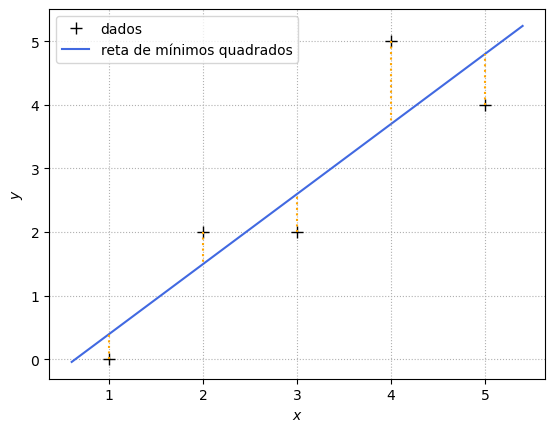

In [17]:
# Plotando os dados e a reta de regressão:
exibe_pontos_e_reta(xs, ys)

## $ \S 6 $ O coeficiente de correlação de Pearson

O __coeficiente de correlação de Pearson__ (universalmente denotado por $ r $)
quantifica a existência e a intensidade da correlação _linear_ entre duas
variáveis $ x $ e $ y $. Ele é sempre um número entre $ -1 $ e $ 1 $.
* Se $ y $ é uma função linear exata de $ x $, então $ r = \pm 1 $
  de acordo com o sinal da inclinação da reta correspondente. Em outras
  palavras, uma correlação linear perfeita corresponde a $ r = \pm 1 $: se uma
  variável aumenta, a outra aumenta ou diminui numa proporção fixa.
* Se $ y $ e $ x $ são completamente independentes (intuitivamente, ortogonais),
  então $ r = 0 $.

__Exemplo:__ Se $ c_i $ e $ p_i $ representam as alturas de pessoas numa determinada
população, medidas em centímetros e em polegadas, respectivamente, então $ r = 1
$. Se $ x_i $ representa a precipitação pluvial em Tóquio no $ i $-ésimo dia do
ano e $ y_i $ o número de carros usados vendidos no Brasil no mesmo dia, então é
de se esperar que $ r $ esteja muito próximo de $ 0 $.

A fórmula para o coeficiente de correlação de Pearson é:
$$
   r = \frac{\boldsymbol x_0 \cdot \boldsymbol y_0}{\Vert \boldsymbol x_0 \Vert\,\Vert \boldsymbol y_0 \Vert}
   = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{m}
   (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{m} (y_i - \bar{y})^2}}
$$

Observe que a primeira expressão para $ r $ pode ser vista como o _cosseno do
ângulo entre $ \boldsymbol x_0 $ e $ \boldsymbol y_0 $._ Daí deduzimos imediatamente que
$ r \in [-1, 1] $.

⚠️ Dados pontos $ (x_i, y_i) $, o coeficiente de correlação de Pearson
correspondente não deve ser confundido com a _inclinação_ $ \hat\beta $ da reta
de mínimos quadrados associada a eles, que pode assumir qualquer valor real.

📝 No contexto da regressão linear simples, pode-se mostrar que $ r^2 = R^2 $ (o coeficiente de determinação da $ \S 4 $).

![Coeficiente de correlação de Pearson 1.0](fig_5-4_exemplo_1.png)
![Coeficiente de correlação de Pearson 0.4](fig_5-4_exemplo_2.png)
![Coeficiente de correlação de Pearson 0.0](fig_5-4_exemplo_3.png)
![Coeficiente de correlação de Pearson -0.9](fig_5-4_exemplo_4.png)

__Exemplo:__ Suponha que um investidor esteja interessado em quantificar a
correlação entre o preço de ações de empresas de um determinado setor e o
os dividendos pagos por elas. Para isto, ele poderia coletar os preços
das ações ($ x $) e os dividendos pagos por ação ($ y $) ao longo de um
determinado período, e então calcular $ r $ utilizando a fórmula acima. 

O procedimento `corrcoef(xs, ys)` do NumPy calcula a _matriz de correlação_ entre dois
arrays (ou listas) `xs` e `ys`.  Os elementos não-diagonais dela fornecem o
coeficiente de correlação entre os valores de $ x $ e $ y $. Mais geralmente,
este procedimento pode ser aplicado para se obter a __matriz de correlação__
de uma coleção de mais de duas listas, digamos `zs_1`, `zs_2`, $ \cdots $, `zs_n`.
A $ (i, j) $-ésima entrada desta matriz representa o coeficiente de
correlação entre os valores das variáveis $ z_i $ e $ z_j $.

In [ ]:
xs = [1, 2, 3, 4, 5]
ys = [1.6, 2.4, 3.2, 4.9, 5.4]

matriz_corr = np.corrcoef(xs, ys)
print(matriz_corr)

[[1.         0.98659914]
 [0.98659914 1.        ]]


In [5]:
zs_1 = [1, 2, 3, 4, 5]
zs_2 = [2, 4, 6, 8, 10]
zs_3 = [5, 4, 3, 2, 1]

matriz_corr = np.corrcoef([zs_1, zs_2, zs_3])

print(matriz_corr)

[[ 1.  1. -1.]
 [ 1.  1. -1.]
 [-1. -1.  1.]]


## $ \S 7 $ Problemas

**Problema 2:** Usando o método dos mínimos quadrados, adapte uma reta aos dados tabelados abaixo:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ -3 $  | $ 3 $  |
| $ -2 $  |  $ 2 $  |
| $ -1 $  | $ 2 $   |
| $ 0 $   |  $ 1 $  |
| $ 1 $   |  $ 0 $  |
| $ 2 $   |  $ 0 $  |
| $ 3 $   |  $ -1 $  |

(a) Sem usar o computador. *Dica:* Utilize a mesma estratégia que no Exemplo 1; comece estendendo a tabela.

(b) Usando o computador. Calcule também o erro padrão residual e o coeficiente de correlação de Pearson.

*Solução:*

__Problema 3:__ Repita o problema anterior para os dados seguintes:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ 1 $  | $ 0 $  |
| $ 2 $  | $ 1 $  |
| $ 3 $  | $ 4 $   |
| $ 4 $   |  $ 9 $  |
| $ 5 $   |  $ 16 $  |
| $ 6 $   |  $ 25 $  |

*Solução:*

**Problema 5:** A tabela seguinte contém a altura e peso de vinte indivíduos.

| altura (em polegadas) | peso (em libras) |
|:---------------------:|:----------------:|
| $ 67.0 $              | $ 175.9 $        |
| $ 63.4 $              | $ 156.3 $        |
| $ 71.1 $              | $ 186.6 $        |
| $ 71.6 $              | $ 213.7 $        |
| $ 64.7 $              | $ 167.1 $        |
| $ 69.2 $              | $ 189.4 $        |
| $ 69.2 $              | $ 186.4 $        |
| $ 67.6 $              | $ 172.1 $        |
| $ 72.4 $              | $ 196.0 $        |
| $ 63.9 $              | $ 172.8 $        |
| $ 69.6 $              | $ 185.9 $        |
| $ 67.9 $              | $ 182.4 $        |
| $ 67.9 $              | $ 174.1 $        |
| $ 69.4 $              | $ 197.7 $        |
| $ 66.1 $              | $ 149.1 $        |
| $ 75.2 $              | $ 228.7 $        |
| $ 67.8 $              | $ 162.0 $        |
| $ 68.1 $              | $ 192.3 $        |
| $ 69.0 $              | $ 184.4 $        |
| $ 72.8 $              | $ 206.8 $        |

(a) Encontre a função da forma $ \text{peso} = \alpha + \beta \, \text{altura} $ que melhor se ajusta a estes dados, e exiba seu gráfico juntamente com os dados.

(b) Usando o modelo linear que você encontrou no item (a), estime o peso em
$ \text{kg} $ de uma pessoa de altura igual a $ 71.3 $ polegadas. (Não esqueça de
converter a sua estimativa de libras para $ \text{kg} $!)

(c) Estime a altura em metros de uma pessoa que pesa $ 165.8 $ libras.

(d) Determine o coeficiente de correlação $ r $ entre a altura e o peso para
este conjunto de dados. Suponha que as alturas e pesos tivessem sido medidos
em $ \text{cm} $ e $ \text{kg} $, respectivamente.
O coeficiente de correlação mudaria? Justifique.

*Solução:*

In [16]:
alturas = [67.0, 63.4, 71.1, 71.6, 64.7,
           69.3, 69.2, 67.6, 72.4, 63.9,
           69.6, 67.9, 67.9, 69.4, 66.1,
           75.2, 67.8, 68.1, 69.0, 72.8]

pesos = [175.9, 156.3, 186.6, 213.7, 167.1,
         189.4, 186.4, 172.1, 196.0, 172.8,
         185.9, 182.4, 174.1, 197.7, 149.1,
         228.7, 162.0, 192.3, 184.4, 206.8]

**Problema 6:** A tabela seguinte fornece a população aproximada da Alemanha no período de $ 1816 $ a $ 1939 $.

| anos | habitantes (mi.) |
|:---:|:----------------------:|
| $ 1816 $ | $ 22.38 $ |
| $ 1828 $ | $ 26.65 $ |
| $ 1834 $ | $ 28.24 $ |
| $ 1840 $ | $ 30.38 $ |
| $ 1852 $ | $ 33.41 $ |
| $ 1861 $ | $ 35.57 $ |
| $ 1864 $ | $ 37.80 $ |
| $ 1871 $ | $ 41.06 $ |
| $ 1880 $ | $ 45.23 $ |
| $ 1890 $ | $ 49.43 $ |
| $ 1900 $ | $ 56.37 $ |
| $ 1910 $ | $ 64.93 $ |
| $ 1925 $ | $ 63.18 $ |
| $ 1933 $ | $ 66.03 $ |
| $ 1939 $ | $ 69.46 $ |

(a) Plote o par (ano, população) para cada linha fornecida. Verifique que parece
existir uma relação aproximadamente linear entre o ano e a população.

(b) Encontre $ \alpha $ e $ \beta $ de modo que a função:
$$
\text{população}  = \alpha + \beta \,\text{ano}
$$
se ajuste aos dados da melhor maneira possível e determine o erro padrão associado.

(c) Estime a população da Alemanha no ano de $ 1800 $ a partir dos dados.

(d) Encontre o ano e mês em que a população da Alemanha superou $ 60 $ milhões de habitantes.

*Solução:*

In [3]:
anos = [1816, 1828, 1834, 1840, 1852,
        1861, 1864, 1871, 1880, 1890,
        1900, 1910, 1925, 1933, 1939]

populacao = [22.38, 26.65, 28.24, 30.38, 33.41,
             35.57, 37.80, 41.06, 45.23, 49.43,
             56.37, 64.93, 63.18, 66.03, 69.46]

**Problema 7:** A tabela abaixo indica a concentração de gás carbônico ($\textrm{CO}_2 $) em partes por milhão na atmosfera da Terra num período de 21 anos ([fonte](https://www.co2levels.org/)).

| Ano (2002 a 2022) | $\textrm{CO}_2$ (em PPM) |
|:-----------------:|:---------------:|
|      $ 2002 $     |    $ 375.66 $   |
|      $ 2003 $     |    $ 378.29 $   |
|      $ 2004 $     |    $ 381.04 $   |
|      $ 2005 $     |    $ 382.58 $   |
|      $ 2006 $     |    $ 384.62 $   |
|      $ 2007 $     |    $ 386.98 $   |
|      $ 2008 $     |    $ 388.48 $   |
|      $ 2009 $     |    $ 390.46 $   |
|      $ 2010 $     |    $ 393.02 $   |
|      $ 2011 $     |    $ 395.12 $   |
|      $ 2012 $     |    $ 397.28 $   |
|      $ 2013 $     |    $ 400.22 $   |
|      $ 2014 $     |    $ 402.13 $   |
|      $ 2015 $     |    $ 404.31 $   |
|      $ 2016 $     |    $ 408.56 $   |
|      $ 2017 $     |    $ 410.03 $   |
|      $ 2018 $     |    $ 412.45 $   |
|      $ 2019 $     |    $ 414.28 $   |
|      $ 2020 $     |    $ 417.69 $   |
|      $ 2021 $     |    $ 419.90 $   |
|      $ 2022 $     |    $ 421.45 $   |

(a) Encontre as constantes $ \alpha,\, \beta \in \mathbb R $ de modo que a equação
$$
\text{concentração de $ \text{CO}_2 $} = \alpha + \beta\,\text{ano}
$$
se ajuste o melhor possível aos dados.

(b) Estime o aumento anual na concentração de gás carbônico.

(c) Preveja a concentração atmosférica de $\text{CO}_2$ no ano de $ 2030 $.

(d) Calcule o coeficiente de correlação $ r $ de Pearson.

*Solução:*

In [19]:
anos = list(range(2002, 2023))
concentracoes = [375.66, 378.29, 381.04, 382.58, 384.62, 
                 386.98, 388.48, 390.46, 393.02, 395.12,
                 397.28, 400.22, 402.13, 404.31, 408.56,
                 410.03, 412.45, 414.28, 417.69, 419.90,
                 421.45]